<a href="https://colab.research.google.com/github/ibader85/PredictiveAnalytics/blob/main/07_Module_4_KNN_And_Naive_Bayes_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

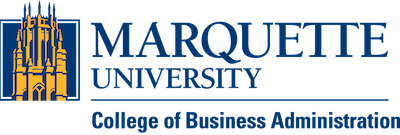

# BUAN 3065: Unlocking Business Insights with Predictive Analytics
# Module 4 KNN & Naive Bayes Exercise Using R

Instructor: Dr. Badar Al Lawati

## K-Nearest Neighbors (KNN)

In [1]:
data1=read.csv("/content/wisc_bc_data.csv",sep = ",",header = TRUE)
data=data1[,-c(1)]
data$diagnosis=factor(data$diagnosis,
                      levels = c("M","B"),
                      labels = c(1,0))

normalize<-function(x){
  return ((x-min(x)) / (max(x)-min(x)))
}
# define a custom function called normalize
# This function takes a numeric vector x as input and returns the normalized version of x, scaling it between 0 and 1 using min-max normalization

data=as.data.frame(lapply(data1[3:31], normalize))
# apply the normalize function to normalize the numeric columns (columns 3 to 31) of the original data (before excluding the first column)
# lapply(data1[3:31], normalize) applies the normalize function to each of the selected numeric columns
# as.data.frame() is used to convert the result back into a data frame, replacing the original data with the normalized value

head(data)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,⋯,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2526859,0.0906324,0.2422777,0.13599152,0.4529205,0.1546838,0.09341612,0.18389662,0.4540404,0.2019798,⋯,0.04675041,0.1981501,0.09648188,0.1820808,0.08943669,0.4446279,0.09635106,0.09920128,0.3227148,0.2487680
2,0.1712812,0.3124789,0.1761454,0.08606575,0.3994764,0.2923747,0.14964855,0.13131213,0.4353535,0.3148694,⋯,0.08371682,0.1405194,0.29104478,0.1388017,0.05888714,0.3310440,0.21752966,0.15303514,0.2723711,0.2710428
3,0.1921056,0.2407846,0.1874784,0.09743372,0.4971563,0.1799276,0.07136832,0.12326044,0.3303030,0.2830666,⋯,0.04502301,0.1593739,0.38432836,0.1470193,0.07034015,0.4340619,0.11730749,0.08522364,0.2553608,0.2824759
4,0.2034644,0.1244505,0.2018520,0.10235419,0.5756974,0.2890007,0.10859888,0.23836978,0.3590909,0.2266217,⋯,0.08800077,0.1419424,0.09994670,0.1300862,0.06114825,0.4327412,0.15029446,0.06924121,0.2959107,0.1058545
5,0.3885182,0.1183632,0.3721927,0.24106045,0.2437483,0.1532421,0.07949859,0.13205765,0.3338384,0.1154170,⋯,0.03013280,0.2942014,0.09888060,0.2693859,0.15579532,0.2735918,0.14204771,0.10878594,0.2810309,0.1817465
6,0.2171896,0.3155225,0.2101444,0.11291622,0.2963799,0.1774124,0.12851453,0.07097416,0.4904040,0.2676917,⋯,0.08444233,0.1828531,0.39872068,0.1793914,0.08240759,0.3548174,0.16145181,0.20447284,0.2290034,0.2897694


###1 Train Test Split

In [2]:
wbcd_train=data[1:469,]
wbcd_test=data[470:569,]

wbcd_train_labels=data1[1:469,2]
wbcd_test_labels=data1[470:569,2]

###2 Model Building & Evaluation

In [3]:
install.packages('caret')
install.packages('class')

# The "class" package provides functions for performing various classification tasks, including k-nearest neighbors (K-NN) classification.
# K-NN is a popular classification algorithm that classifies an observation based on the majority class of its k nearest neighbors in the feature space
# The "class" package provides tools to implement and customize K-NN classification in R

library(class)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice



In [4]:
wbcd_test_pred=knn(train = wbcd_train,test = wbcd_test,
                   cl=wbcd_train_labels,k=21)

# the knn() function will apply the K-NN algorithm to the test data
# For each instance in the test data, it will find the 21 nearest neighbors
# from the training data based on the chosen distance metric and use a majority vote to predict the class of the test instance

In [5]:
confusionMatrix(as.factor(wbcd_test_labels),as.factor(wbcd_test_pred))
# compute the confusion matrix and related classification metrics for a classification problem

Confusion Matrix and Statistics

          Reference
Prediction  B  M
         B 61  0
         M  3 36
                                          
               Accuracy : 0.97            
                 95% CI : (0.9148, 0.9938)
    No Information Rate : 0.64            
    P-Value [Acc > NIR] : 1.262e-15       
                                          
                  Kappa : 0.9361          
                                          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 0.9531          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9231          
             Prevalence : 0.6400          
         Detection Rate : 0.6100          
   Detection Prevalence : 0.6100          
      Balanced Accuracy : 0.9766          
                                          
       'Positive' Class : B               
                                    

## Naïve Bayes

We will make a SMS Filter using Naive Bayes!!
It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature

In [6]:
sms_raw=read.csv("/content/sms_spam.csv",stringsAsFactors = FALSE)
# The stringsAsFactors = FALSE argument ensures that character vectors in the data frame are not automatically converted to factors
# This is useful when you want to work with text data as-is, without converting it to factors.


sms_raw$type=as.factor(sms_raw$type)
# convert the "type" column in the sms_raw data frame to a factor
# as.factor() is used to perform the conversion
# By converting the "type" column to a factor, you are likely preparing the data for a classification task where "type" represents the class labels

In [7]:
install.packages('tm')
library(tm)
# The "tm" package provides a set of tools and functions for performing text mining and text analysis tasks
# Text mining involves extracting meaningful insights and information from unstructured text data

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate




In [8]:
# createa a "VCorpus" object, which is a corpus (a collection of text documents) in the "tm" package
# The "V" in "VCorpus" stands for "Vector," indicating that it is a corpus created from a vector of text data

sms_corpus=VCorpus(VectorSource(sms_raw$text))

In [9]:
# apply the as.character function to the first three elements of the "sms_corpus" object, which are text documents in the corpus
lapply(sms_corpus[1:3], as.character)

$`1`
[1] "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

$`2`
[1] "Ok lar... Joking wif u oni..."

$`3`
[1] "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

### 1. Text Cleaning

In [10]:
#tRANSFORMING ALL THE SMS IN TO LOWER LETTER

sms_corpus_clean=tm_map(sms_corpus,content_transformer(tolower))

In [11]:
#removing Numbers
sms_corpus_clean=tm_map(sms_corpus_clean,removeNumbers)

In [12]:
#removing StopWords
sms_corpus_clean=tm_map(sms_corpus_clean,removeWords,stopwords())

In [13]:
#removing Punctuation
sms_corpus_clean=tm_map(sms_corpus_clean,removePunctuation)

In [14]:
#Stemming
install.packages('SnowballC')
library(SnowballC)
# library provides stemming algorithms for multiple languages

sms_corpus_clean=tm_map(sms_corpus_clean,
                        stemDocument)

# StemDocument is used to perform stemming on text documents
# Stemming reduces words to their base or root form, which can help in simplifying the text and grouping variations of a word together
# For example, "jumping" and "jumps" might be stemmed to "jump

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
#Removing Extra WhiteSpace
sms_corpus_clean=tm_map(sms_corpus_clean,
                        stripWhitespace)

In [16]:
#Document Term Matrix(Tokenization)
sms_dtm=DocumentTermMatrix(sms_corpus_clean)
sms_dtm

# A DTM is a matrix that represents the frequency of terms (words or phrases) in a collection of documents
# Rows typically represent documents, and columns represent terms (words or phrases)
# The values in the matrix represent the frequency of each term in each document
# When you run this code, it will generate the "sms_dtm" object, which is a Document-Term Matrix containing the term
# frequencies for the words or terms found in the preprocessed text documents

<<DocumentTermMatrix (documents: 5574, terms: 6592)>>
Non-/sparse entries: 42608/36701200
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

### 2. Train Test Split

In [17]:
sms_dtm_train=sms_dtm[1:4174,]
sms_dtm_test=sms_dtm[4175:5574,]

sms_train_labels=sms_raw[1:4174,]$type
sms_test_labels=sms_raw[4175:5574,]$type

In [18]:
prop.table(table(sms_train_labels))
# calculate the proportion (or percentage) of each class label in the training set labels

sms_train_labels
      ham      spam 
0.8646382 0.1353618 

In [19]:
prop.table(table(sms_test_labels))
# calculate the proportion (or percentage) of each class label in the testing set labels

sms_test_labels
 ham spam 
0.87 0.13 

In [20]:
install.packages("wordcloud")
library(wordcloud)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: RColorBrewer



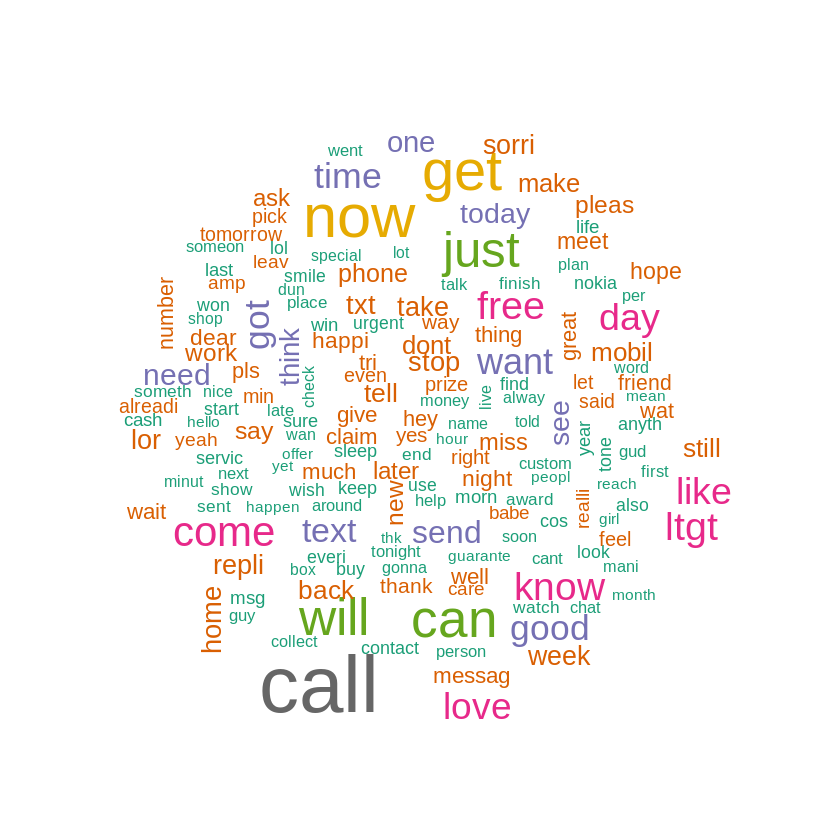

In [21]:
wordcloud(sms_corpus_clean,min.freq = 50,
          random.order = TRUE,
          colors = brewer.pal(8,"Dark2"))
# the "Dark2" color palette from the RColorBrewer package to color the words in the word cloud

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


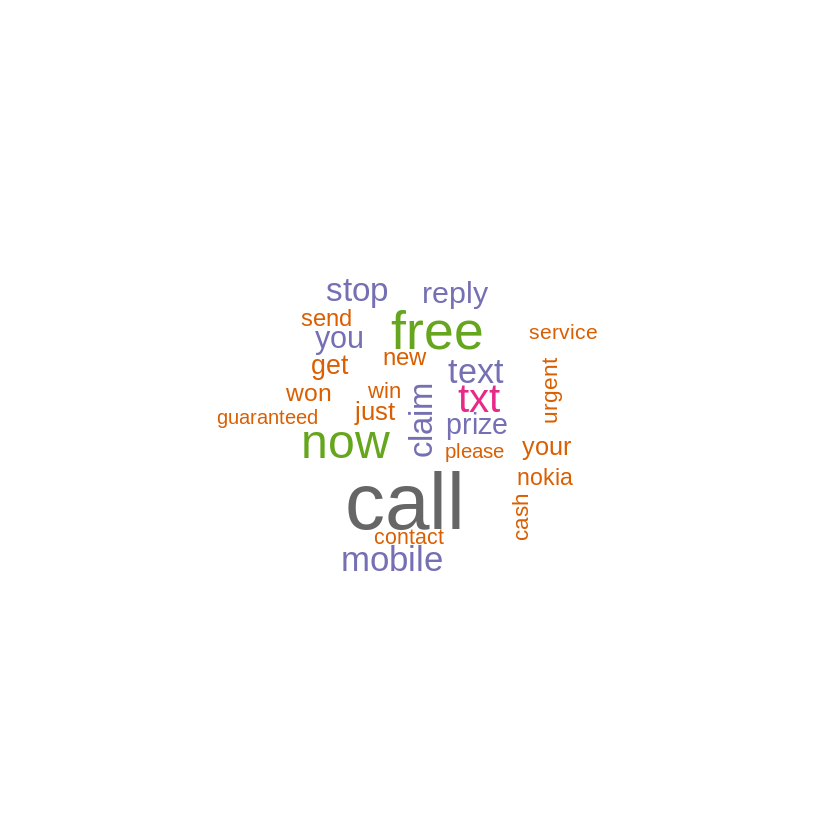

In [22]:
spam=subset(sms_raw,type=="spam")
ham=subset(sms_raw,type=="ham")

wordcloud(spam$text,min.freq = 50,random.order = TRUE,
          colors = brewer.pal(8,"Dark2"))

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


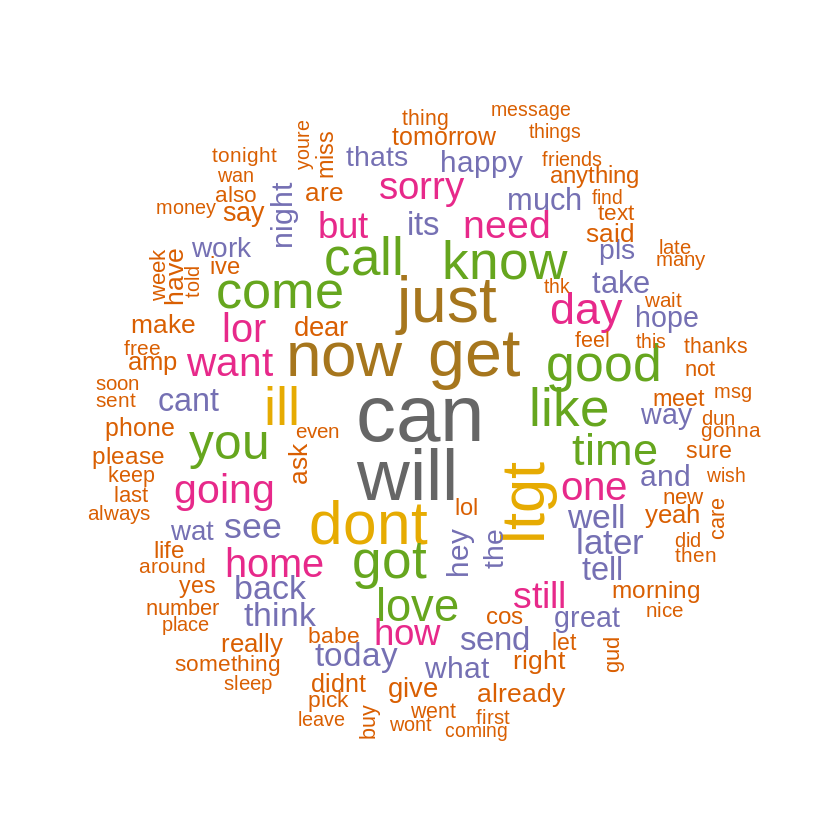

In [23]:
wordcloud(ham$text,min.freq = 50,random.order = FALSE,colors = brewer.pal(8,"Dark2"))

In [24]:
sms_freq_words=findFreqTerms(sms_dtm_train,5)
# identify frequent terms (words or features) in the training DTM that appear at least 5 times in the training documents

sms_dtm_freq_train=sms_dtm_train[,sms_freq_words]
# subset= the training DTM ("sms_dtm_train") to only include the columns corresponding to the frequent terms identified earlier

sms_dtm_freq_test=sms_dtm_test[,sms_freq_words]
# subset= the training DTM ("sms_dtm_test") to only include the columns corresponding to the frequent terms identified earlier

convert_counts=function(x){
  x=ifelse(x>0,"Yes","No")
}
# defines a custom function called "convert_counts." This function takes a numeric input "x" (presumably
# the values in your binary DTM), and it converts values greater than 0 to "Yes" and values less than or equal to 0 to "No."

sms_train=apply(sms_dtm_freq_train,2,convert_counts)
# apply the "convert_counts" function to each column (term) in the "sms_dtm_freq_train" DTM
# It effectively converts the term frequency counts into binary values of "Yes" or "No"
# based on whether a term is present (count > 0) or not (count <= 0) in each document of the training dataset

sms_test=apply(sms_dtm_freq_test, 2, convert_counts)
# applies the "convert_counts" function to each column in the "sms_dtm_freq_test" DTM,
# converting the term frequency counts into binary values for the test dataset

###3. SMS Filter Model

In [25]:
install.packages("e1071")
library(e1071)
# Package e1071 provides functions and tools for machine learning, including support for building Naive Bayes classifiers

sms_classifier=naiveBayes(sms_train,sms_train_labels)
sms_classifier

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘e1071’


The following object is masked from ‘package:ggplot2’:

    element





Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = sms_train, y = sms_train_labels)

A-priori probabilities:
sms_train_labels
      ham      spam 
0.8646382 0.1353618 

Conditional probabilities:
                £wk
sms_train_labels          No         Yes
            ham  1.000000000 0.000000000
            spam 0.991150442 0.008849558

                abiola
sms_train_labels          No         Yes
            ham  0.996952064 0.003047936
            spam 1.000000000 0.000000000

                abl
sms_train_labels          No         Yes
            ham  0.995012469 0.004987531
            spam 1.000000000 0.000000000

                abt
sms_train_labels          No         Yes
            ham  0.994458299 0.005541701
            spam 1.000000000 0.000000000

                accept
sms_train_labels         No        Yes
            ham  0.99833749 0.00166251
            spam 1.00000000 0.00000000

                access
sms_train_labels           No     

###4. Evaluation and Prediction

In [26]:
sms_test_pred=predict(sms_classifier,sms_test)
# The predict function is used to obtain predictions

In [27]:
install.packages("caret")
library("caret")
confusionMatrix(sms_test_pred, sms_test_labels, positive = "spam")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Confusion Matrix and Statistics

          Reference
Prediction  ham spam
      ham  1209   20
      spam    9  162
                                          
               Accuracy : 0.9793          
                 95% CI : (0.9704, 0.9861)
    No Information Rate : 0.87            
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.906           
                                          
 Mcnemar's Test P-Value : 0.06332         
                                          
            Sensitivity : 0.8901          
            Specificity : 0.9926          
         Pos Pred Value : 0.9474          
         Neg Pred Value : 0.9837          
             Prevalence : 0.1300          
         Detection Rate : 0.1157          
   Detection Prevalence : 0.1221          
      Balanced Accuracy : 0.9414          
                                          
       'Positive' Class : spam            
                        